In [1]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


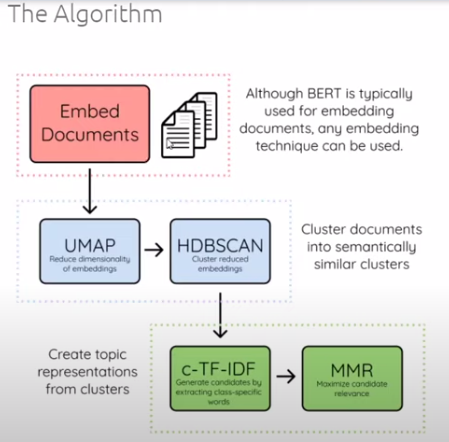

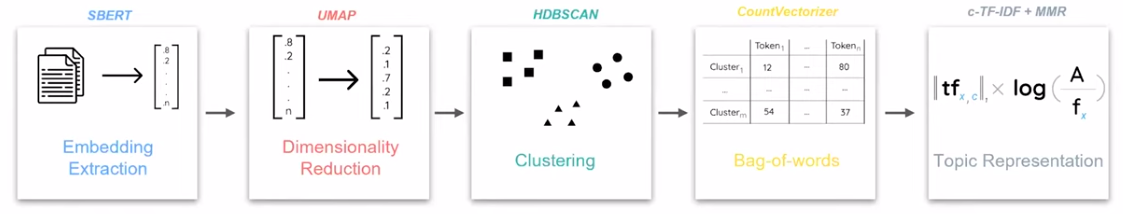

In [2]:
# Newsgroup Data

#from sklearn.datasets import fetch_20newsgroups
#docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [ ]:
# Arxiv Abstract Data 

with open('arxivData.json') as f:
    d = json.load(f)
    print(d)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(d)

41000

In [ ]:
d[0]

{'author': "[{'name': 'Ahmed Osman'}, {'name': 'Wojciech Samek'}]",
 'day': 1,
 'id': '1802.00209v1',
 'link': "[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1802.00209v1', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1802.00209v1', 'type': 'application/pdf', 'title': 'pdf'}]",
 'month': 2,
 'summary': 'We propose an architecture for VQA which utilizes recurrent layers to\ngenerate visual and textual attention. The memory characteristic of the\nproposed recurrent attention units offers a rich joint embedding of visual and\ntextual features and enables the model to reason relations between several\nparts of the image and question. Our single model outperforms the first place\nwinner on the VQA 1.0 dataset, performs within margin to the current\nstate-of-the-art ensemble model. We also experiment with replacing attention\nmechanisms in other state-of-the-art models with our implementation and show\nincreased accuracy. In both cases, our recurrent attention

In [ ]:
import json

ids = []
titles = []
abstracts = []
years = []

for paper in d:
    ids.append(paper['id'])
    titles.append(paper['title'])
    abstracts.append(paper['summary'])
    years.append(paper['year'])

In [ ]:
import pandas as pd

papers_df = pd.DataFrame()
papers_df['id'] = ids
papers_df['title'] = titles
papers_df['abstracts'] = abstracts
papers_df['year'] = years

In [ ]:
papers_df.head()

id                                              title  \
0  1802.00209v1  Dual Recurrent Attention Units for Visual Ques...   
1  1603.03827v1  Sequential Short-Text Classification with Recu...   
2  1606.00776v2  Multiresolution Recurrent Neural Networks: An ...   
3  1705.08142v2  Learning what to share between loosely related...   
4  1709.02349v2              A Deep Reinforcement Learning Chatbot   

                                           abstracts  year  
0  We propose an architecture for VQA which utili...  2018  
1  Recent approaches based on artificial neural n...  2016  
2  We introduce the multiresolution recurrent neu...  2016  
3  Multi-task learning is motivated by the observ...  2017  
4  We present MILABOT: a deep reinforcement learn...  2017

In [ ]:
len(papers_df)

41000

In [28]:
docs = papers_df['abstracts'].tolist()

In [29]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/1282 [00:00<?, ?it/s]

2023-01-29 10:24:16,138 - BERTopic - Transformed documents to Embeddings
2023-01-29 10:24:56,660 - BERTopic - Reduced dimensionality
2023-01-29 10:34:09,201 - BERTopic - Clustered reduced embeddings


In [53]:
probs

array([[0.00019178, 0.00017128, 0.0003138 , ..., 0.00045644, 0.00022814,
        0.00017494],
       [0.00083825, 0.00075675, 0.00080805, ..., 0.00068152, 0.0007583 ,
        0.00136893],
       [0.00068032, 0.00061402, 0.00065249, ..., 0.0005517 , 0.00061797,
        0.00112406],
       ...,
       [0.0004391 , 0.00043707, 0.00052074, ..., 0.00038363, 0.00120686,
        0.00042835],
       [0.00016679, 0.00016491, 0.00019427, ..., 0.00015584, 0.00053776,
        0.00017662],
       [0.00056734, 0.00053831, 0.0006356 , ..., 0.00063524, 0.00057497,
        0.00080281]])

In [54]:
probs.shape

(41000, 486)

In BERTopic, in order to get an accurate representation of the topics from our bag-of-words matrix, TF-IDF was adjusted to work on a cluster/categorical/topic-level instead of a document-level. This adjusted TF-IDF representation is called c-TF-IDF takes into account what makes the documents in once cluster different from documents in another cluster:

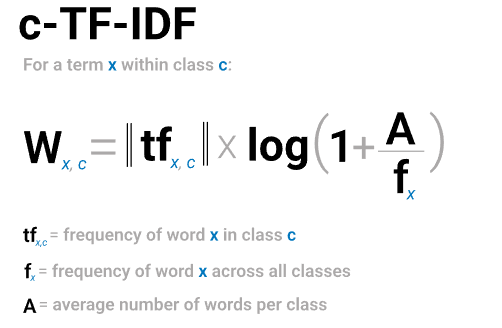


Each cluster is converted to a single document instead of a set of documents. Then, we extract the frequency of word x in class c, where c refers to the cluster we created before. This results in our class-based tf representation. This representation is L1-normalized to account for the differences in topic sizes.

Then, we take take the logarithm of one plus the average number of words per class A divided by the frequency of word x across all classes. We add plus one within the logarithm to force values to be positive. This results in our class-based idf representation. Like with the classic TF-IDF, we then multiply tf with idf to get the importance score per word in each class. In other words, the classical TF-IDF procedure is not used here but a modified version of the algorithm that allows for a much better representation.

This class-based TF-IDF representation is enabled by default in BERTopic.

In [30]:
# Extracting Topics

freq = topic_model.get_topic_info()
freq.head(5)

Topic  Count                                        Name
0     -1  16042                            -1_of_the_and_to
1      0    457           0_policy_reinforcement_value_mdps
2      1    294  1_evolutionary_population_genetic_mutation
3      2    294            2_spiking_neurons_spike_synaptic
4      3    289                3_topic_topics_lda_dirichlet

In [31]:
max(freq['Topic'])

485

In [32]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [33]:
# Select the most frequent words for TOPIC 0

topic_model.get_topic(0)

[('policy', 0.019469285242562407),
 ('reinforcement', 0.011794747324602563),
 ('value', 0.009804164038243012),
 ('mdps', 0.009523907508869193),
 ('policies', 0.009222885688536924),
 ('mdp', 0.008472658663157554),
 ('markov', 0.007441267572012145),
 ('rl', 0.006869283938723043),
 ('decision', 0.006806671374861044),
 ('pomdps', 0.006324142451118759)]

In [34]:
# to access the predicted topics for the first 10 documents

topic_model.topics_[:10]

[43, 6, 6, 375, 6, -1, 6, 26, 43, -1]

In [35]:
# Visualization Intertopic Distance
topic_model.visualize_topics()

In [48]:
# few topics by creating bar charts out of the c-TF-IDF scores for each topic representation. 
# Insights can be gained from the relative c-TF-IDF scores between and within topics.

topic_model.visualize_barchart(top_n_topics=8, n_words = 10, height = 300)

In [62]:
doc_wise_topic_probs = pd.DataFrame(probs)
doc_wise_topic_probs.columns = freq['Name'].tolist()[1:len(probs)]
doc_wise_topic_probs.head()

0_policy_reinforcement_value_mdps  \
0                       1.917753e-04   
1                       8.382489e-04   
2                       6.803230e-04   
3                      4.427751e-307   
4                       1.064780e-03   

   1_evolutionary_population_genetic_mutation  \
0                                1.712792e-04   
1                                7.567493e-04   
2                                6.140222e-04   
3                               3.887448e-307   
4                                9.495020e-04   

   2_spiking_neurons_spike_synaptic  3_topic_topics_lda_dirichlet  \
0                      3.138023e-04                  1.738742e-04   
1                      8.080525e-04                  1.623607e-03   
2                      6.524907e-04                  1.356926e-03   
3                     7.183338e-307                 4.371200e-307   
4                      1.007024e-03                  1.878259e-03   

   4_dictionary_sparse_signal_dictionaries  \
0                             2.100700e-04   
1                             6.019556e-04   
2                             4.900020e-04   
3                            6.555067e-307   
4                             7.313883e-04   

   5_stochastic_convergence_gradient_convex  \
0                              1.987490e-04   
1                              6.427830e-04   
2                              5.228649e-04   
3                             6.442509e-307   
4                              7.907376e-04   

   6_dialogue_dialog_conversation_conversational  \
0                                   2.261900e-04   
1                                   3.268758e-02   
2                                   1.916660e-02   
3                                  4.482222e-307   
4                                   9.902511e-02   

   7_bandit_regret_arms_multiarmed  8_recommendation_items_recommender_users  \
0                     1.781750e-04                              1.989831e-04   
1                     7.748870e-04                              1.530007e-03   
2                     6.305075e-04                              1.263342e-03   
3                    4.685229e-307                             5.657863e-307   
4                     9.738886e-04                              1.869948e-03   

   9_translation_nmt_bleu_machine  ...  \
0                    2.084054e-04  ...   
1                    3.411529e-03  ...   
2                    2.871845e-03  ...   
3                   4.043457e-307  ...   
4                    3.423974e-03  ...   

   476_imbalance_oversampling_imbalanced_lhm  477_facial_face_uv_3d  \
0                               3.939682e-04           3.142913e-04   
1                               7.801868e-04           6.178464e-04   
2                               6.325276e-04           5.004919e-04   
3                              1.395679e-306          4.681529e-307   
4                               9.572890e-04           7.452713e-04   

   478_soccer_football_nfl_players  479_adr_health_media_drug  \
0                     2.005779e-04               1.925066e-04   
1                     9.886379e-04               2.122933e-03   
2                     8.013021e-04               1.770956e-03   
3                    4.696875e-307              4.798401e-307   
4                     1.266388e-03               2.458676e-03   

   480_search_user_click_engine  481_clir_translation_query_documents  \
0                  2.050200e-04                          1.879023e-04   
1                  1.576364e-03                          3.053591e-03   
2                  1.301381e-03                          2.603505e-03   
3                 5.897295e-307                         3.963939e-307   
4                  1.950749e-03                          3.158683e-03   

   482_unithood_metaphors_termhood_corpus  483_gesture_depth_gestures_bof  \
0                            1.798827e-04                    4.564414e-04   
1                            2.677

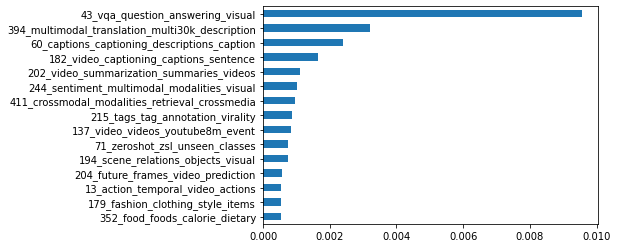

In [81]:
# Visualizing Topic Distribution of Document 0

document = 0

s = doc_wise_topic_probs.loc[document, :].sort_values(ascending = True)
s.tail(15).plot.barh()

In [82]:
# Visualize Topic Similarity

topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

Each word is represented by a c-TF-IDF score. The higher the score, the more representative a word to the topic is. Since the topic words are sorted by their c-TF-IDF score, the scores slowly decline with each word that is added. At some point adding words to the topic representation only marginally increases the total c-TF-IDF score and would not be beneficial for its representation.

To visualize this effect, we can plot the c-TF-IDF scores for each topic by the term rank of each word. In other words, the position of the words (term rank), where the words with the highest c-TF-IDF score will have a rank of 1, will be put on the x-axis. Whereas the y-axis will be populated by the c-TF-IDF scores. The result is a visualization that shows you the decline of c-TF-IDF score when adding words to the topic representation. It allows you, using the elbow method, the select the best number of words in a topic.

In [83]:
topic_model.visualize_term_rank()

# Customised BERTopic

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
dim_model = PCA(n_components = 5)
cluster_model = KMeans(n_clusters = 50)

In [ ]:
topic_model = BERTopic(embedding_model="allenai-specter", umap_model = dim_model, hdbscan_model = cluster_model, calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

In [ ]:
freq = topic_model.get_topic_info()
freq.head(5)